In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os

In [4]:
datapath = '/content/drive/MyDrive/archive (3)'

In [5]:
table_df = pd.read_csv(os.path.join(datapath, 'HAM10000_metadata.csv'))

In [7]:
table_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [9]:
table_df['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

<Axes: xlabel='dx', ylabel='count'>

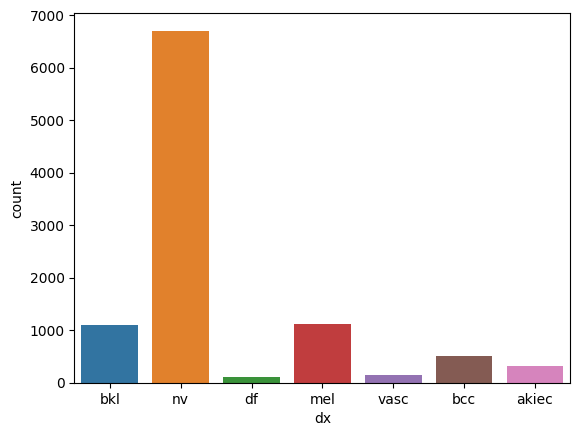

In [11]:
sns.countplot(data=table_df, x='dx')

([<matplotlib.patches.Wedge at 0x7f38d361f040>,
 [Text(-0.13714768093581628, 1.091416746075452, 'male'),
  Text(0.1176120673972217, -1.0936943821756384, 'female'),
  Text(1.0998241706389156, -0.0196670709161753, 'unknown')])

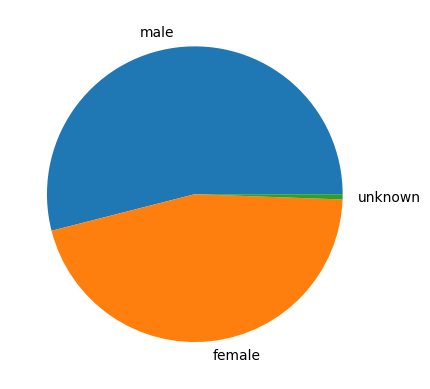

In [14]:
plt.pie(table_df['sex'].value_counts(), labels=table_df['sex'].value_counts().index)

In [15]:
temp = table_df[['localization', 'sex']].value_counts().to_frame()
temp.reset_index(level=[1,0], inplace=True)
temp = temp.rename(columns={'localization': 'location', 0: 'count'})

<Axes: xlabel='location', ylabel='count'>

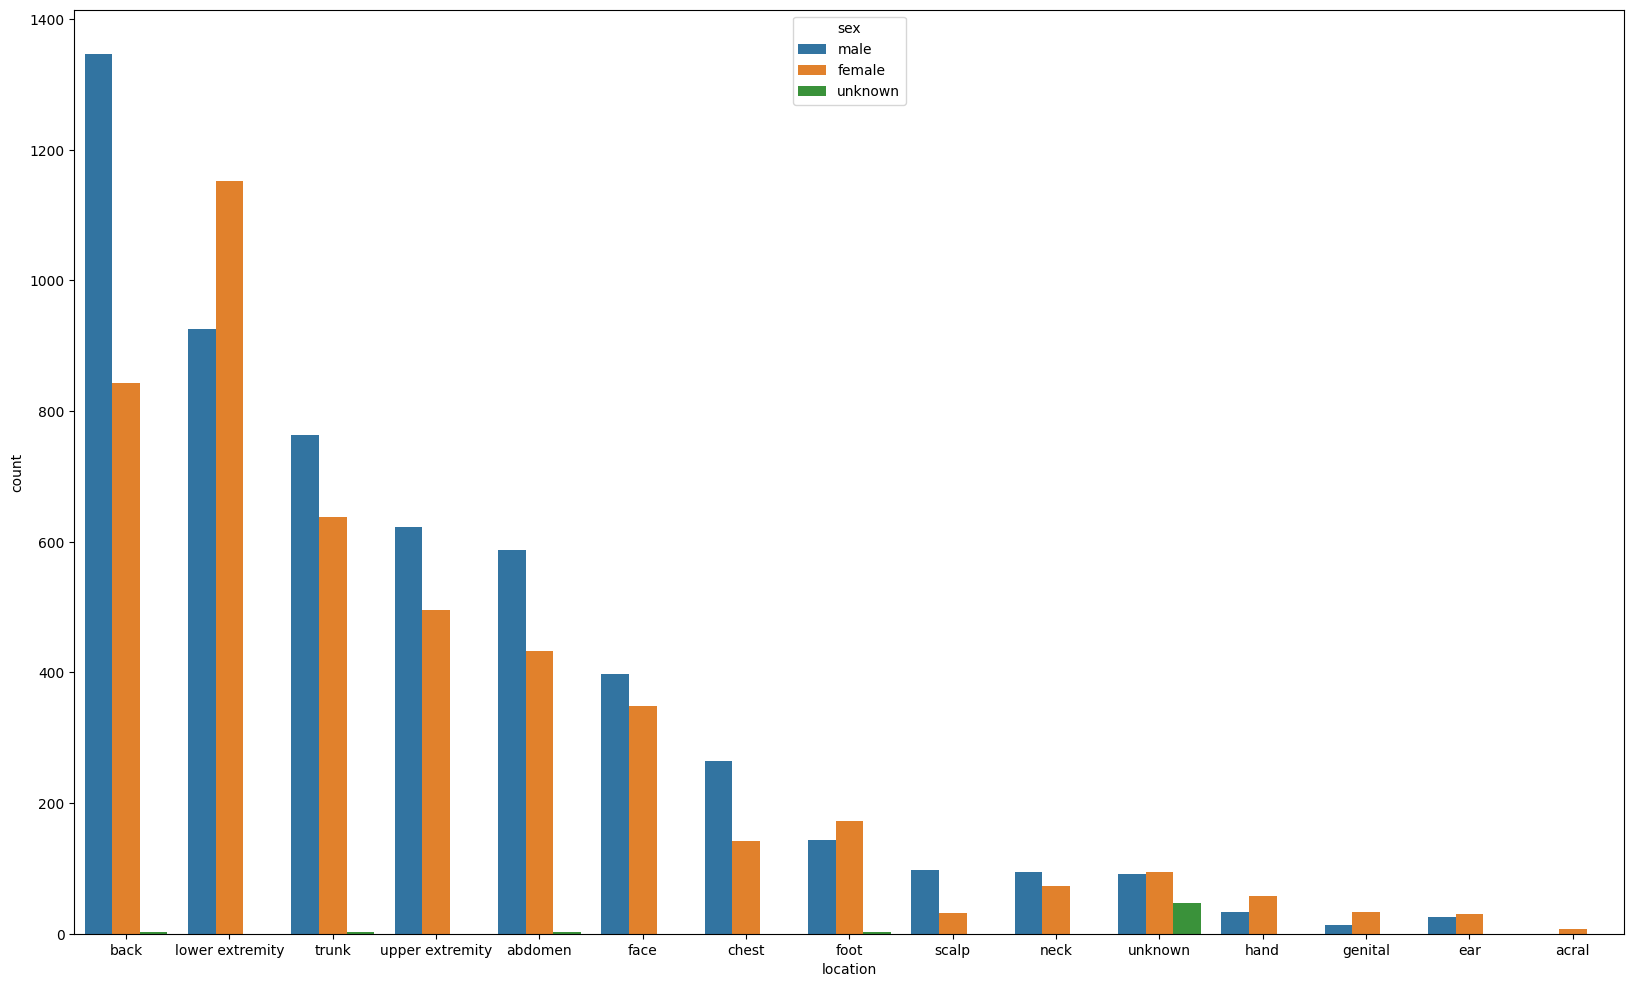

In [21]:
fig, ax = plt.subplots(figsize=(20,12))
sns.barplot(x='location', y='count', hue='sex', data=temp)

In [22]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
df=pd.read_csv(os.path.join(datapath,'hmnist_28_28_RGB.csv'))

In [25]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [29]:
x=df.drop('label', axis=1)
y=df['label']

In [30]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)
x = np.array(x).reshape(-1,28,28,3)

In [31]:
x = (x-np.mean(x))/np.std(x)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense

In [34]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [39]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(datapath, 'best_model.h5'),
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [40]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])

In [41]:
history = model.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
206/206 [==============================] - ETA: 0s - loss: 0.5982 - accuracy: 0.7806
Epoch 1: saving model to /content/drive/MyDrive/archive (3)/best_model.h5
206/206 [==============================] - 70s 329ms/step - loss: 0.5982 - accuracy: 0.7806 - val_loss: 0.5211 - val_accuracy: 0.8034
Epoch 2/20
206/206 [==============================] - ETA: 0s - loss: 0.4122 - accuracy: 0.8494
Epoch 2: saving model to /content/drive/MyDrive/archive (3)/best_model.h5
206/206 [==============================] - 70s 338ms/step - loss: 0.4122 - accuracy: 0.8494 - val_loss: 0.3543 - val_accuracy: 0.8729
Epoch 3/20
206/206 [==============================] - ETA: 0s - loss: 0.3088 - accuracy: 0.8909
Epoch 3: saving model to /content/drive/MyDrive/archive (3)/best_model.h5
206/206 [==============================] - 65s 316ms/step - loss: 0.3088 - accuracy: 0.8909 - val_loss: 0.3098 - val_accuracy: 0.8842
Epoch 4/20
206/206 [==============================] - ETA: 0s - loss: 0.2279 - accuracy:

In [42]:
model.load_weights(os.path.join(datapath, 'best_model.h5'))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

441/441 - 10s - loss: 0.1627 - accuracy: 0.9727 - 10s/epoch - 22ms/step
